In [1]:
using ScikitLearn, InformationMeasures, RDatasets

In [2]:
@sk_import feature_selection: mutual_info_regression

PyObject <function mutual_info_regression at 0x7f0dfe9d9e50>

In [3]:
using DataFrames, CSV, MultivariateStats

In [4]:
using MLJ

In [194]:
using Plots, StatsPlots

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278


In [119]:
#using LinearAlgebra: svd
using LinearAlgebra

In [5]:
autos = CSV.read("./Data/autos.csv",DataFrame);

In [6]:
describe(autos)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,symboling,0.797927,-2,1.0,3,0,Int64
2,make,,alfa-romero,,volvo,0,String
3,fuel_type,,diesel,,gas,0,String
4,aspiration,,std,,turbo,0,String
5,num_of_doors,3.16062,2,4.0,4,0,Int64
6,body_style,,convertible,,wagon,0,String
7,drive_wheels,,4wd,,rwd,0,String
8,engine_location,,front,,rear,0,String
9,wheel_base,98.9238,86.6,97.0,120.9,0,Float64


In [7]:
CatColumnNames = names(autos[!,[eltype(c)==String for c in eachcol(autos)]])

8-element Array{String,1}:
 "make"
 "fuel_type"
 "aspiration"
 "body_style"
 "drive_wheels"
 "engine_location"
 "engine_type"
 "fuel_system"

In [8]:
for name in CatColumnNames
    println(name, " : ", unique(autos[!,name]))
end

make : ["alfa-romero", "audi", "bmw", "chevrolet", "dodge", "honda", "isuzu", "jaguar", "mazda", "mercedes-benz", "mercury", "mitsubishi", "nissan", "peugot", "plymouth", "porsche", "saab", "subaru", "toyota", "volkswagen", "volvo"]
fuel_type : ["gas", "diesel"]
aspiration : ["std", "turbo"]
body_style : ["convertible", "hatchback", "sedan", "wagon", "hardtop"]
drive_wheels : ["rwd", "fwd", "4wd"]
engine_location : ["front", "rear"]
engine_type : ["dohc", "ohcv", "ohc", "l", "ohcf"]
fuel_system : ["mpfi", "2bbl", "mfi", "1bbl", "spfi", "idi", "spdi"]


In [9]:
features = [:GarageArea, :YearRemodAdd, :TotalBsmtSF, :GrLivArea ]

4-element Array{Symbol,1}:
 :GarageArea
 :YearRemodAdd
 :TotalBsmtSF
 :GrLivArea

In [10]:
using Statistics

In [11]:
ames = CSV.read("./Data/ames.csv",DataFrame);

In [12]:
describe(ames)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,MSSubClass,,Duplex_All_Styles_and_Ages,,Two_and_Half_Story_All_Ages
2,MSZoning,,A_agr,,Residential_Medium_Density
3,LotFrontage,57.6478,0.0,63.0,313.0
4,LotArea,10147.9,1300.0,9436.5,215245.0
5,Street,,Grvl,,Pave
6,Alley,,Gravel,,Paved
7,LotShape,,Irregular,,Slightly_Irregular
8,LandContour,,Bnk,,Lvl
9,Utilities,,AllPub,,NoSewr


In [112]:
c=cor(convert(Array,ames[!,features]),convert(Vector,ames[!,:SalePrice]))

4×1 Array{Float64,2}:
 0.640138298487373
 0.532973754026695
 0.6325288490320323
 0.7067799209766275

In [14]:
DataFrame(names=features, correlation=c[:,1])

,names,correlation
,Symbol,Float64
1,GarageArea,0.640138
2,YearRemodAdd,0.532974
3,TotalBsmtSF,0.632529
4,GrLivArea,0.70678


In [15]:
ames_subset = ames[:,features];

In [16]:
#nie działa
#combine(ames_subset, features => (x) -> cor(x, ames[!,:SalePrice]))

In [17]:
M=fit(PCA,convert(Array,ames_subset)', method=:svd)

PCA(indim = 4, outdim = 3, principalratio = 0.9992766204058094)

In [18]:
mean(M)

4-element Array{Float64,1}:
  472.65836177474404
 1984.266552901024
 1051.2556313993175
 1499.6904436860068

In [19]:
                  PC1       PC2       PC3       PC4
GarageArea    0.541229  0.102375 -0.038470  0.833733
YearRemodAdd  0.427077 -0.886612 -0.049062 -0.170639
TotalBsmtSF   0.510076  0.360778 -0.666836 -0.406192
GrLivArea     0.514294  0.270700  0.742592 -0.332837

LoadError: syntax: extra token "PC2" after end of expression

In [20]:
projection(M)

4×3 Array{Float64,2}:
 -0.227363   -0.0586085    0.971734
 -0.0133136  -0.00195081   0.0220368
 -0.583169   -0.791151    -0.184298
 -0.779771    0.608803    -0.14588

In [21]:
principalvars(M)

3-element Array{Float64,1}:
 345033.03254762484
 121480.08247913633
  29690.856597438273

In [22]:
principalratio(M)

0.9992766204058094

In [125]:
first(ames_subset,5)

,GarageArea,YearRemodAdd,TotalBsmtSF,GrLivArea
,Float64,Int64,Float64,Float64
1,528.0,1960,1080.0,1656.0
2,730.0,1961,882.0,896.0
3,312.0,1958,1329.0,1329.0
4,522.0,1968,2110.0,2110.0
5,482.0,1998,928.0,1629.0


In [126]:
ames_subset_scaled = mapcols(x->(x.-mean(x))./std(x), ames_subset);
first(ames_subset_scaled,5)

,GarageArea,YearRemodAdd,TotalBsmtSF,GrLivArea
,Float64,Float64,Float64,Float64
1,0.257179,-1.16329,0.0651847,0.309212
2,1.1959,-1.11535,-0.383827,-1.19422
3,-0.746598,-1.25917,0.629852,-0.337661
4,0.229296,-0.779786,2.40096,1.20732
5,0.0434117,0.658354,-0.279511,0.255801


In [124]:
c=cov(convert(Array,ames_subset_scaled))

4×4 Array{Float64,2}:
 1.0       0.375566  0.485608  0.483971
 0.375566  1.0       0.298393  0.316855
 0.485608  0.298393  1.0       0.445108
 0.483971  0.316855  0.445108  1.0

In [121]:
vals,vecs = eigen(c)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
4-element Array{Float64,1}:
 0.4933397395078824
 0.5542944197462255
 0.738471152242467
 2.2138946885034256
vectors:
4×4 Array{Float64,2}:
  0.833733  -0.0384696   0.102375  -0.541229
 -0.170639  -0.0490615  -0.886612  -0.427077
 -0.406192  -0.666836    0.360778  -0.510076
 -0.332837   0.742592    0.2707    -0.514294

In [122]:
U,S,V = svd(c)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
4×4 Array{Float64,2}:
 -0.541229   0.102375  -0.0384696  -0.833733
 -0.427077  -0.886612  -0.0490615   0.170639
 -0.510076   0.360778  -0.666836    0.406192
 -0.514294   0.2707     0.742592    0.332837
singular values:
4-element Array{Float64,1}:
 2.213894688503426
 0.7384711522424672
 0.5542944197462255
 0.4933397395078828
Vt factor:
4×4 Array{Float64,2}:
 -0.541229   -0.427077   -0.510076  -0.514294
  0.102375   -0.886612    0.360778   0.2707
 -0.0384696  -0.0490615  -0.666836   0.742592
 -0.833733    0.170639    0.406192   0.332837

In [123]:
cumsum(S)/sum(S)

4-element Array{Float64,1}:
 0.5534736721258563
 0.738091460186473
 0.8766650651230292
 1.0

In [59]:
iris = dataset("datasets", "iris");
first(iris,5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [25]:
describe(iris)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,0,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,0,Float64
3,PetalLength,3.758,1.0,4.35,6.9,0,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,0,Float64
5,Species,,setosa,,virginica,0,"CategoricalValue{String,UInt8}"


In [28]:
iris_X = iris[!,Not(:Species)]
iris_y = iris[!,:Species];
unique(iris_y)

3-element Array{String,1}:
 "setosa"
 "versicolor"
 "virginica"

In [48]:
reshape( unique(iris_y), (1,3))

1×3 Array{String,2}:
 "setosa"  "versicolor"  "virginica"

In [30]:
labels = Dict( i => name for (i,name) in enumerate(unique(iris_y)) );

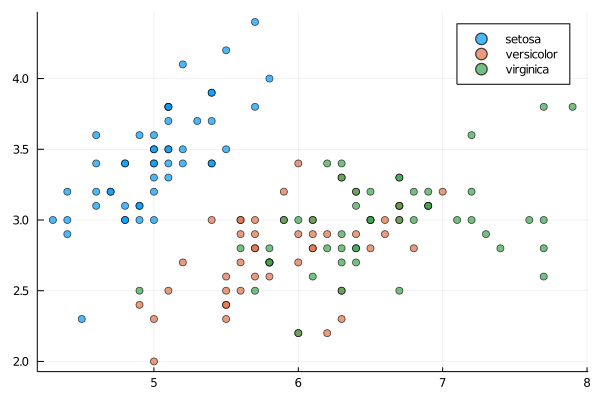

In [50]:
#setosa = iris[ iris.Species .== "setosa", [:SepalLength, :SepalWidth]];
species = [ (iris[ iris.Species .== name, :SepalLength], iris[ iris.Species .== name, :SepalWidth]) for name in unique(iris_y)]
scatter(species, label = reshape(unique(iris_y), (1,3)), alpha=0.7)

In [68]:
ms = mapcols(x -> (μ=mean(x),σ=std(x)), iris_X)

,SepalLength,SepalWidth,PetalLength
,NamedTu…,NamedTu…,NamedTu…
1,"(μ = 5.84333, σ = 0.828066)","(μ = 3.05733, σ = 0.435866)","(μ = 3.758, σ = 1.7653)"


In [83]:
iris_scaled_X = DataFrame()
@time for cn in names(iris_X)
    col = iris_X[!,cn]
    μ,σ = mean(col), std(col)
    iris_scaled_X[:,cn] = (col .- μ) ./ σ
end

  0.000054 seconds (55 allocations: 12.391 KiB)


In [102]:
#cr=cor(convert(Array,iris_scaled_X)) correlation matrix is the same
c=cov(convert(Array,iris_scaled_X))

4×4 Array{Float64,2}:
  1.0       -0.11757    0.871754   0.817941
 -0.11757    1.0       -0.42844   -0.366126
  0.871754  -0.42844    1.0        0.962865
  0.817941  -0.366126   0.962865   1.0

In [139]:
 U,S,V=svd(c)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
4×4 Array{Float64,2}:
 -0.541229   0.102375  -0.0384696  -0.833733
 -0.427077  -0.886612  -0.0490615   0.170639
 -0.510076   0.360778  -0.666836    0.406192
 -0.514294   0.2707     0.742592    0.332837
singular values:
4-element Array{Float64,1}:
 2.213894688503426
 0.7384711522424672
 0.5542944197462255
 0.4933397395078828
Vt factor:
4×4 Array{Float64,2}:
 -0.541229   -0.427077   -0.510076  -0.514294
  0.102375   -0.886612    0.360778   0.2707
 -0.0384696  -0.0490615  -0.666836   0.742592
 -0.833733    0.170639    0.406192   0.332837

In [156]:
vals,vecs = eigen(c)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
4-element Array{Float64,1}:
 0.4933397395078824
 0.5542944197462255
 0.738471152242467
 2.2138946885034256
vectors:
4×4 Array{Float64,2}:
  0.833733  -0.0384696   0.102375  -0.541229
 -0.170639  -0.0490615  -0.886612  -0.427077
 -0.406192  -0.666836    0.360778  -0.510076
 -0.332837   0.742592    0.2707    -0.514294

In [177]:
sort( collect(zip(vals,eachcol(vecs))), rev=true )

4-element Array{Tuple{Float64,SubArray{Float64,1,Array{Float64,2},Tuple{Base.Slice{Base.OneTo{Int64}},Int64},true}},1}:
 (2.2138946885034256, [-0.5412294221958748, -0.4270772547456739, -0.5100756026874698, -0.5142942840159054])
 (0.738471152242467, [0.1023746696677728, -0.8866116458334643, 0.3607779840020004, 0.2706999496533799])
 (0.5542944197462255, [-0.03846963237899531, -0.04906150720084851, -0.6668360722388553, 0.742591885665917])
 (0.4933397395078824, [0.8337327071337426, -0.17063931687203732, -0.40619180021699486, -0.33283662362991595])

In [145]:
scree=cumsum(S)/sum(S)

4-element Array{Float64,1}:
 0.5534736721258563
 0.738091460186473
 0.8766650651230292
 1.0

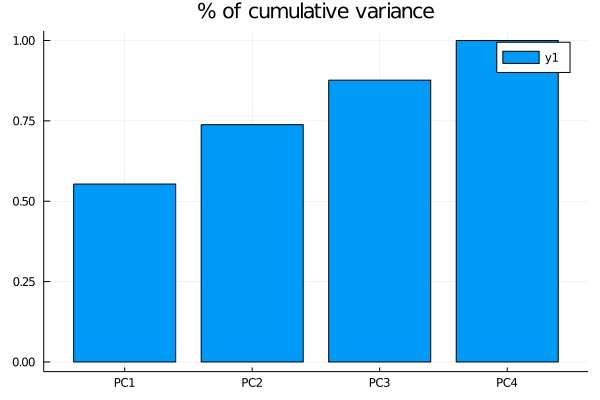

In [151]:
bar(["PC$x" for x in 1:4],scree;title="% of cumulative variance")

In [201]:
#y = rand(100, 4) # Four series of 100 points each
#violin(["Series 1" "Series 2" "Series 3" "Series 4"], y, leg = false)

#ir = convert(Array,iris_X)'
#violin(names(iris_X), ir)

#boxplot(names(iris_X), ir)

In [234]:
map( x->x[2], sort( collect(zip(vals,eachcol(vecs))), rev=true )[1:2] )

2-element Array{SubArray{Float64,1,Array{Float64,2},Tuple{Base.Slice{Base.OneTo{Int64}},Int64},true},1}:
 [-0.5412294221958748, -0.4270772547456739, -0.5100756026874698, -0.5142942840159054]
 [0.1023746696677728, -0.8866116458334643, 0.3607779840020004, 0.2706999496533799]

In [257]:
v1 = [-0.897674 1.0156 -1.33575 -1.31105]
v2 = [-0.33283662362991595 0.742591885665917 0.2706999496533799 -0.5142942840159054]'
println("v1 ",size(v1))
println("v2 ",size(v2))
v1*v2

v1 (1, 4)
v2 (4, 1)


1×1 Array{Float64,2}:
 1.3656331656722172

In [297]:
#cols = [:SepalLength, :SepalWidth, :PetalLength, :PetalWidth]
#iris_scaled_X.PC1 = convert(Array,iris_scaled_X[!,cols])*vecs[:,4]
describe(iris_scaled_X)
#iris_scaled_X.PC2 = convert(Array,iris_scaled_X[!,cols])*vecs[:,3]

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,SepalLength,-4.13928e-16,-1.86378,-0.0523308,2.4837,0,Float64
2,SepalWidth,-7.80487e-16,-2.42582,-0.131539,3.08046,0,Float64
3,PetalLength,-2.84957e-16,-1.56234,0.335354,1.77987,0,Float64
4,PetalWidth,-3.04201e-16,-1.44224,0.132067,1.70638,0,Float64
5,PC1,8.57832e-16,-3.46647,0.0350888,2.9371,0,Float64
6,PC2,5.26986e-16,-3.49423,0.483805,2.19285,0,Float64


In [301]:
scatter(iris_scaled_X.PC1, iris_scaled_X.PC2, xlabel="PC1", ylabel="PC2", legend=false)

<!DOCTYPE html>
 
 
 Plots.jl

In [304]:
PC1vsPC2 = [ (iris_scaled_X[ iris.Species .== name, :PC1], iris_scaled_X[ iris.Species .== name, :PC2]) for name in unique(iris_y)]
scatter(PC1vsPC2, label = reshape(unique(iris_y), (1,3)), alpha=0.7)

<!DOCTYPE html>
 
 
 Plots.jl

## Retrieve nth typle element - applied in list of tuples

In [224]:
t=[(0,:a), (1,:b), (2,:c)]
reshape([e[2] for e in t],1,3)

1×3 Array{Symbol,2}:
 :a  :b  :c

In [229]:
(x->x[2]).(t)

3-element Array{Symbol,1}:
 :a
 :b
 :c

In [230]:
map(x->x[2],t)

3-element Array{Symbol,1}:
 :a
 :b
 :c

In [318]:
[1:5;7:10]

9-element Array{Int64,1}:
  1
  2
  3
  4
  5
  7
  8
  9
 10

In [319]:
IrisPCA=fit(PCA,convert(Array,iris_X)', method=:svd)

PCA(indim = 4, outdim = 3, principalratio = 0.9947878161267246)